# Temporary Discretization
<p>This notebook will explore the use of temporarily discretizing an array to simulate a higher resolution of flow. If it works, this method would save a lot of memory.</p>

## Taylor Series
<p>The crux of this method hinges on describing the shape of the heads between 2 values as a Taylor Series. For now, it will be a 1D series, but it could easily be expanded to have more terms and become nonlinear.</p>
<p>Linear regression formula:</p>
<h3><center>$A = \frac{X^{T}y}{(X^{T}X)^{-1}}$</center></h3>
<p>Where $A$ is a vector of multipliers. For the linear example, it will contain m and b from y = mx + b</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def linearize(xs,ys):
    '''
    Returns an array with 2 elements: m and b.
    '''
    X = np.array([array,np.ones(xs.size)])
    return np.linalg.inv((X.T@X))@X.T@ys

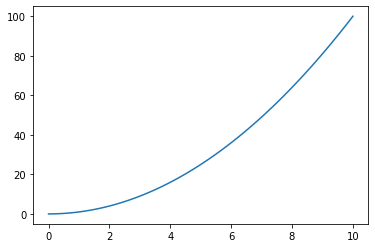

In [3]:
%matplotlib inline
x = np.linspace(0,10,100)
y = x**2
plt.plot(x,y)
plt.show()